Nama      : Muhammad Farhan Alharits

NIM       : 09011281823067

Referensi : https://www.kaggle.com/zhu701/mushroom-classification-simple-ann-with-python


# Klasifikasi jamur menggunakan metode ANN dengan python

Tujuan dibuat ini adalah untuk membangun model yang berhasil mengklasifikasikan jamur yang dapat dimakan dan jamur yang yang beracun berdasarkan fiturnya.

Pertama, masukkan dataset jamurnya.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Memasukkan dataset
data= pd.read_csv('mushrooms.csv')
data.shape

(8124, 23)

In [2]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Karena semua variabel input bersifat kategorikal, kita dapat mengubah semuanya menggunakan LabelEncoder. Untuk variabel target (kelas), 1 beracun dan 0 bisa dimakan.

In [3]:
# Mengkodekan data kategorikal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Sekarang kita dapat memisahkan variabel input dan target. Seperti yang telah kita lihat di atas, variabel pertama adalah variabel target. 22 variabel sisanya merupakan variabel input.

In [4]:
x = data.iloc[:, 1:23].values
y = data.iloc[:, 0].values

Selanjutnya kita dapat membagi dataset menjadi train dan set. Saya akan menggunakan 80% untuk pelatihan dan 20% untuk pengujian.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train.shape

(6499, 22)

In [6]:
X_test.shape

(1625, 22)

Disini tidak perlu normalisasi / standarisasi karena variabel bersifat kategoris. Saya akan mulai membangun ANN. Kita dapat menggunakan trik ini untuk menemukan unit optimal untuk node output - cukup bagi jumlah variabel input (22) dengan 2.

## ========================================================================
## BACK PROPAGATION

Pada bagian ini Hidden Layers, input dan ouput layer ditambahkan, dengan kedua input layer menggunakan aktivasi ReLU sedangkan output layer menggunakan aktivasi sigmoid.

Dari input menuju ke hidden layer 1, hidden layer 1 ke hidden layer 2, dan hidden layer 2 menuju ke outputdisebut Forward Pass, karena aktivasinya menggunakan ReLU maka menggunakan f(x)=max(0,x)
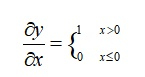
lalu untuk aktivasi sigmoid akan diturunkan menjadi :
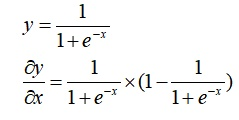

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Inisiasi ANN
classifier = Sequential()

# Menambah input layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))

# Menambah hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Menambah output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Mengkompilasi ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                253       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 12        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


## ========================================================================
Selanjutnya adalah backward pass yang akan mengalirkan loss keseluruh node - node sehingga didapatkan gradient loss
1. mencari turunan parsial:
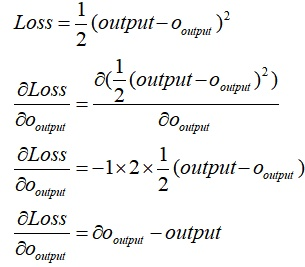
2. mencari gradient Oout terhadap Oin karena aktivasi sigmoid maka menggunakan turunan yang telah disebutkan sebelumnya
3. mencari gradient Oin terhadap Wk1o...Wkno dan bias (bo)
4. lalu menggunakan chain rule

In [8]:
# Menyesuaikan ANN ke set Pelatihan
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
6499/6499 [==============================] - 1s 206us/step - loss: 0.4264 - accuracy: 0.8041
Epoch 2/50
6499/6499 [==============================] - 1s 172us/step - loss: 0.2350 - accuracy: 0.9218
Epoch 3/50
6499/6499 [==============================] - 1s 169us/step - loss: 0.1955 - accuracy: 0.9388
Epoch 4/50
6499/6499 [==============================] - 1s 169us/step - loss: 0.1771 - accuracy: 0.9435
Epoch 5/50
6499/6499 [==============================] - 1s 177us/step - loss: 0.1569 - accuracy: 0.9497
Epoch 6/50
6499/6499 [==============================] - 1s 189us/step - loss: 0.1365 - accuracy: 0.9561
Epoch 7/50
6499/6499 [==============================] - 1s 194us/step - loss: 0.1191 - accuracy: 0.9635
Epoch 8/50
6499/6499 [==============================] - 1s 194us/step - loss: 0.1075 - accuracy: 0.9668
Epoch 9/50
6499/6499 [==============================] - 1s 192us/step - loss: 0.0953 - accuracy: 0.9728
Epoch 10/50
6499/6499 [==============================] - 1s 175u

Tingkat akurasinya sangat tinggi. Kita dapat menggunakan matplotlib untuk memvisualisasikan akurasi dan kerugian setiap epoch.

In [9]:
import matplotlib.pyplot as plt
# Mengecek nama key-nya
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


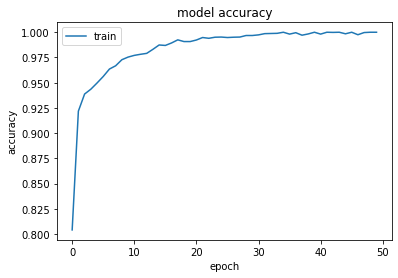

In [10]:
# Meringkas history untuk akurasi
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

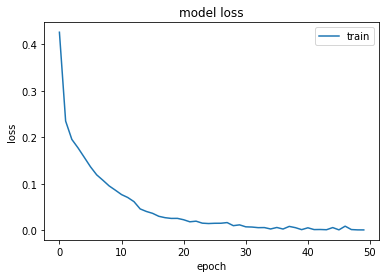

In [11]:
# Meringkas history untuk yang kehilangan
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Memprediksi dengan menggunakan model ANN dan membuat "confusion matrix" untuk melihat hasil tesnya! 

In [12]:
# Memprediksi hasil set pengujian
y_pred = classifier.predict(X_test) # Berikut probabilitasnya
y_pred = (y_pred > 0.5) # Kita butuh mengkonvert ini ke biner

# Membuat "Confusion Matrix"
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[852   0]
 [  0 773]]


Seperti yang ditunjukkan di atas, kita telah berhasil memprediksi semua jamur yang dapat dimakan dan beracun di set pengujian.